In [108]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime

In [112]:
x = [datetime.date.today() + datetime.timedelta(days=i) for i in range(500)]
time = np.arange(0, 10, 0.02)
amplitude = np.sin(time)
amplitude =np.reshape(amplitude,(1,500))
amplitude.shape

(1, 500)

<ipython-input-118-668a2844018e>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(np.array(x),[1,2],amplitude,cmap='RdBu')


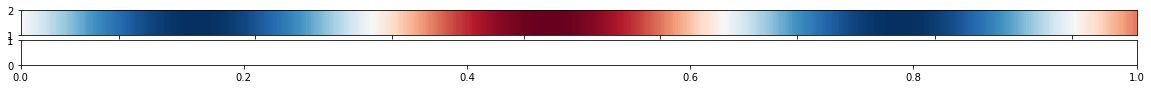

In [118]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,1))
ax1.pcolormesh(np.array(x),[1,2],amplitude,cmap='RdBu')